In [1]:
!pip install kaggle

  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)


In [41]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, Flatten, Dense
from keras import utils as k_utils
%matplotlib inline
import os
import PIL.Image
import glob
import pathlib


In [99]:
os.environ['KAGGLE_USERNAME']="andrejilin"
os.environ['KAGGLE_KEY']="..."

In [13]:
! kaggle datasets download -d alexattia/the-simpsons-characters-dataset

the-simpsons-characters-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
# ! unzip "./the-simpsons-characters-dataset.zip"

In [3]:
data_dir = "./simpsons_dataset"
path_test = "./kaggle_simpson_testset"

In [4]:
data_dir = pathlib.Path(data_dir)
Image_count = len(list(data_dir.glob('*/*.jpg')))
Image_count

20933

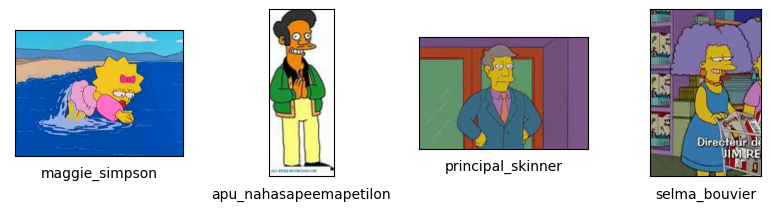

In [12]:
labels = os.listdir(data_dir)
# taked templates from https://www.tensorflow.org/tutorials/images/cnn

plt.figure(figsize=(10,10))
for i in range(0, 4):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    label = labels[i]
    name = label+"/pic_0000.jpg"
    fullname = f'{data_dir}/{name}'
    plt.imshow(load_img(fullname))
    plt.xlabel(label)
    
plt.show()

In [43]:
image_size = (64, 64, 3)
batch_size = 100
seed = 42
train_datagen = ImageDataGenerator( validation_split=0.2, rescale= 1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2
                                    )

train_generator = train_datagen.flow_from_directory(
                                    data_dir, 
                                    target_size=image_size[:2],
                                    subset='training',
                                    batch_size=batch_size,
                                    shuffle=True, 
                                    seed = seed,
                                    color_mode='rgb',
                                    class_mode='categorical'
)

datagen  = ImageDataGenerator(validation_split=0.2, rescale= 1./255)

val_generator  = datagen.flow_from_directory(
                                    data_dir,
                                    target_size=image_size[:2],
                                    subset ='validation',
                                    batch_size=batch_size,
                                    shuffle=True, 
                                    seed = seed,
                                    color_mode='rgb',
                                    class_mode='categorical'
)

Found 33511 images belonging to 43 classes.
Found 8355 images belonging to 43 classes.


In [44]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    break

(100, 64, 64, 3)


In [45]:
train_generator.class_indices.keys()

dict_keys(['abraham_grampa_simpson', 'agnes_skinner', 'apu_nahasapeemapetilon', 'barney_gumble', 'bart_simpson', 'carl_carlson', 'charles_montgomery_burns', 'chief_wiggum', 'cletus_spuckler', 'comic_book_guy', 'disco_stu', 'edna_krabappel', 'fat_tony', 'gil', 'groundskeeper_willie', 'homer_simpson', 'kent_brockman', 'krusty_the_clown', 'lenny_leonard', 'lionel_hutz', 'lisa_simpson', 'maggie_simpson', 'marge_simpson', 'martin_prince', 'mayor_quimby', 'milhouse_van_houten', 'miss_hoover', 'moe_szyslak', 'ned_flanders', 'nelson_muntz', 'otto_mann', 'patty_bouvier', 'principal_skinner', 'professor_john_frink', 'rainier_wolfcastle', 'ralph_wiggum', 'selma_bouvier', 'sideshow_bob', 'sideshow_mel', 'simpsons_dataset', 'snake_jailbird', 'troy_mcclure', 'waylon_smithers'])

####  [Tamplate for build model got from here](https://makeschool.org/mediabook/oa/tutorials/keras-for-image-classification-pfw/building-a-keras-sequential-model/)

In [54]:
"""padding: one of "valid" or "same" (case-insensitive). "valid" means no padding.
"same" results in padding with zeros evenly to the left/right or up/down of the input.
When padding="same" and strides=1, the output has the same size as the input."""

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=image_size, activation="relu"))
model.add(Conv2D(32, (3, 3),strides=(1, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3, 3),padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), strides=(1, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

# model.add(Conv2D(128, (3, 3),padding='same', activation="relu"))
# model.add(Conv2D(128, (3, 3), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.20))

model.add(Conv2D(256, (3, 3),padding='same', activation="relu"))
model.add(Conv2D(256, (3, 3),strides=(1, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

# model.add(Conv2D(512, (3, 3),padding='same', activation="relu"))
# model.add(Conv2D(512, (3, 3), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.20))
model.add(Dense(len(labels), activation='softmax'))

In [55]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 conv2d_61 (Conv2D)          (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_62 (Conv2D)          (None, 31, 31, 64)        18496     
                                                                 
 conv2d_63 (Conv2D)          (None, 29, 29, 64)        36928     
                                                     

In [37]:
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [38]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'model_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [39]:
history = model.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=[chechpoint])

Epoch 1/10
336/336 [==============================] - 136s 400ms/step - loss: 2.2999 - accuracy: 0.4985 - val_loss: 2.2542 - val_accuracy: 0.5010
Epoch 2/10
336/336 [==============================] - 134s 398ms/step - loss: 2.2408 - accuracy: 0.4996 - val_loss: 2.1580 - val_accuracy: 0.5010
Epoch 3/10
336/336 [==============================] - 134s 399ms/step - loss: 2.1117 - accuracy: 0.4987 - val_loss: 1.9818 - val_accuracy: 0.5050
Epoch 4/10
336/336 [==============================] - 134s 398ms/step - loss: 1.7445 - accuracy: 0.4972 - val_loss: 1.7687 - val_accuracy: 0.4281
Epoch 6/10
336/336 [==============================] - 134s 399ms/step - loss: 1.6128 - accuracy: 0.5038 - val_loss: 1.9848 - val_accuracy: 0.3879
Epoch 7/10
336/336 [==============================] - 134s 398ms/step - loss: 1.4981 - accuracy: 0.5110 - val_loss: 2.1955 - val_accuracy: 0.3545
Epoch 8/10
336/336 [==============================] - 134s 398ms/step - loss: 1.4164 - accuracy: 0.5143 - val_loss: 2.1015 -

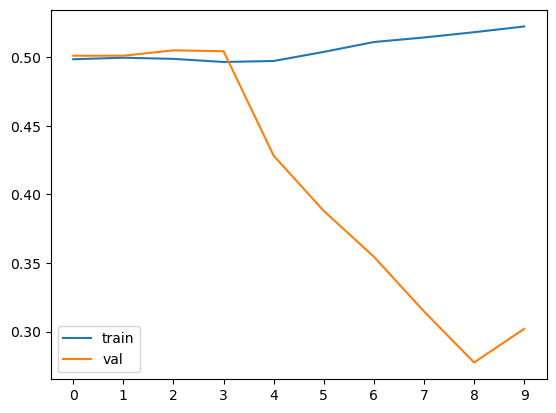

In [42]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()